             name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.0654

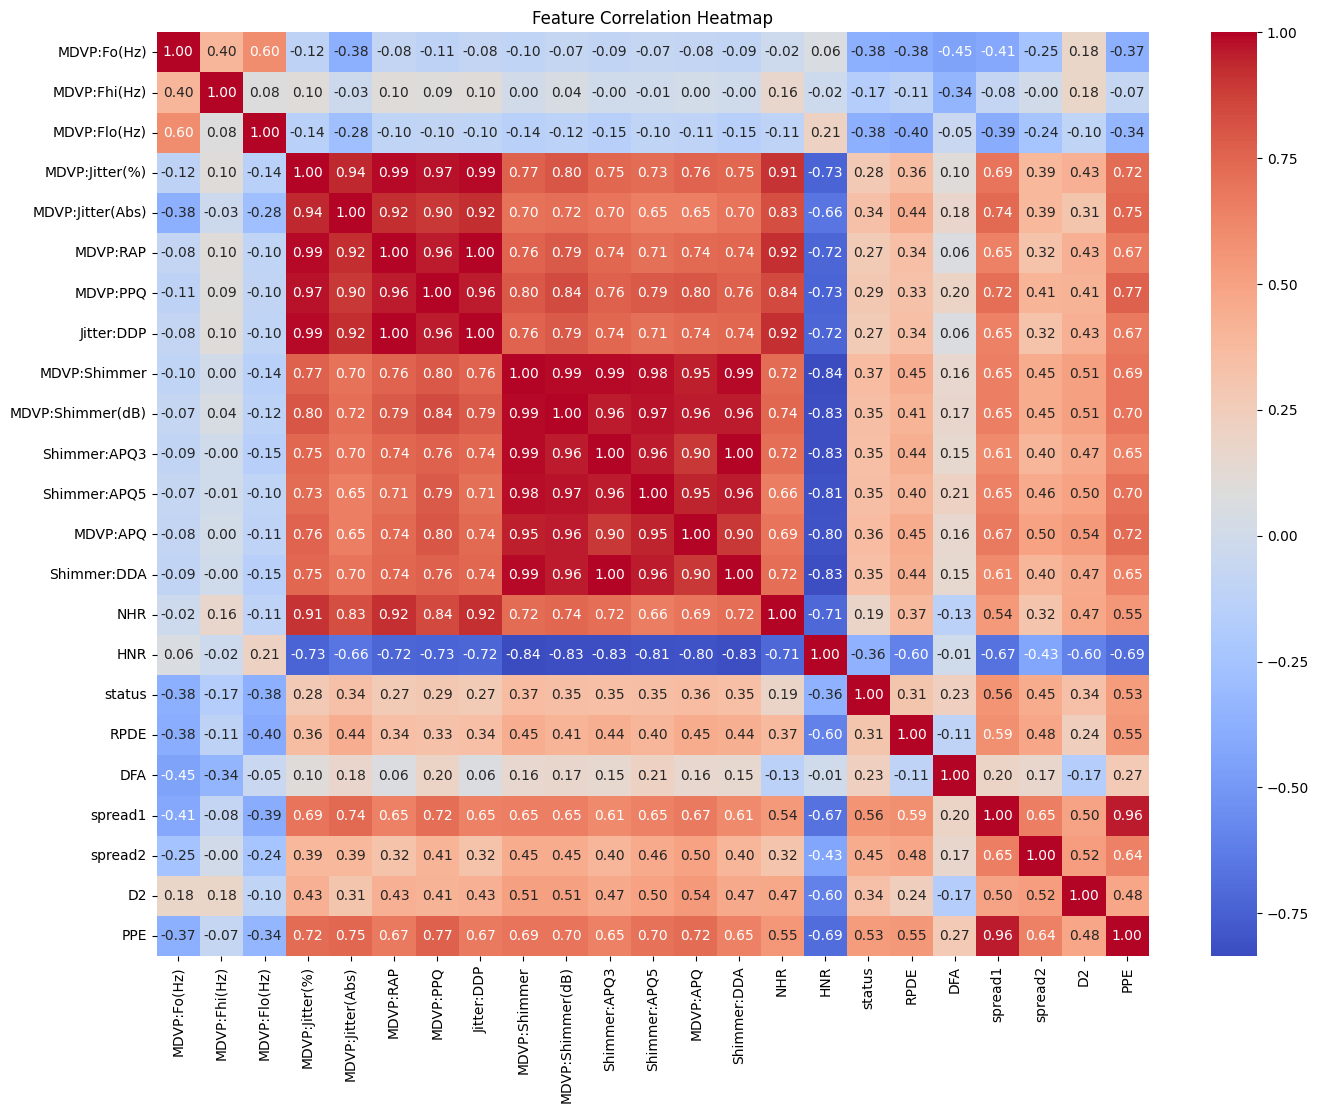

F1-Score (accuracy metric used throughout project): 0.9411764705882353
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       0.89      1.00      0.94        32

    accuracy                           0.90        39
   macro avg       0.94      0.71      0.77        39
weighted avg       0.91      0.90      0.88        39



In [2]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
df = pd.read_csv(r"C:\Users\bhatt\Dropbox\Aryan\Code\ParkinsonsResearchProj\parkinsons.data", delimiter=',')

# Display a summary of the dataset (optional)
print(df.head())

# Select only numeric columns for correlation matrix computation
numeric_df = df.select_dtypes(include=['number'])

# Create a heatmap for feature correlations
plt.figure(figsize=(16, 12))
correlation_matrix = numeric_df.corr()  # Compute the correlation matrix using only numeric columns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

# Split the data into features and target variable
X = df.drop(['name', 'status'], axis=1)  # Drop 'name' as it is not a feature, and 'status' is the target
y = df['status']  # 'status' is the target variable (1 for Parkinson's, 0 for healthy)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a logistic regression model (can be changed to other models)
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)
f1 = classification_report(y_test, y_pred, output_dict=True)['1']['f1-score']

# Evaluate the model
print("F1-Score (accuracy metric used throughout project):", f1)
print("Classification Report:\n", classification_report(y_test, y_pred))
